<a href="https://www.kaggle.com/code/mehmetcubukcu/drowsiness-classification-yolov8?scriptVersionId=174434901" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 19.8 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 26.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import wandb
from kaggle_secrets import UserSecretsClient
from ultralytics import YOLO

In [4]:
user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_api_key") 

wandb.login(key=my_secret)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

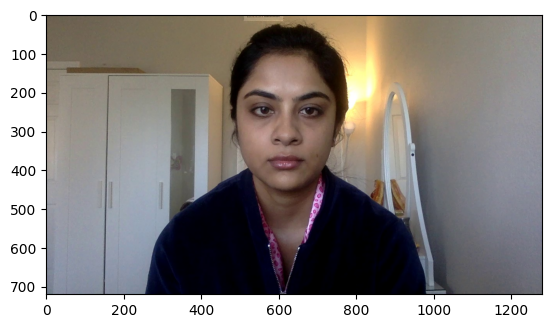

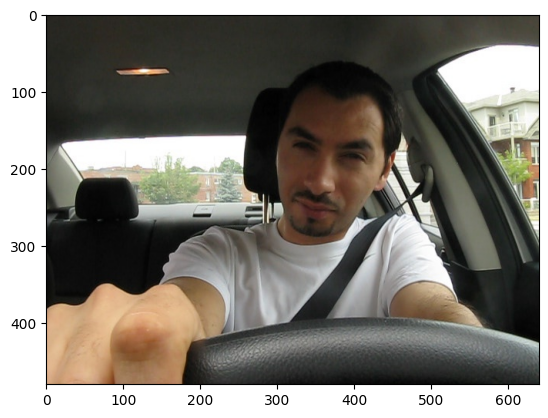

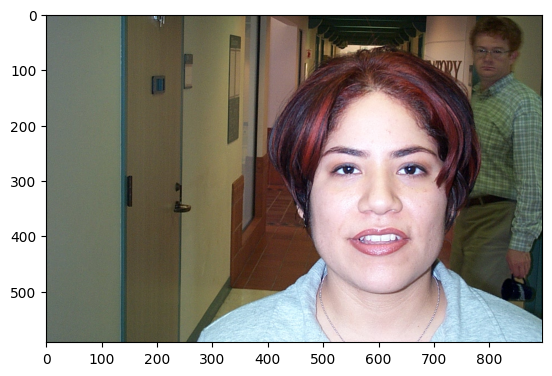

In [5]:
sample1 = mpimg.imread('/kaggle/input/drowsiness-detection/drowsiness/test/Active/image_16153.jpg')
sample2 = mpimg.imread('/kaggle/input/drowsiness-detection/drowsiness/test/Fatigue/30.jpg')
sample3 = mpimg.imread('/kaggle/input/drowsiness-detection/drowsiness/val/Active/image_0170.jpg')
plt.imshow(sample1)
plt.show()
plt.imshow(sample2)
plt.show()
plt.imshow(sample3)
plt.show()

In [6]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')


# Train the model
results = model.train(data='/kaggle/input/drowsiness-detection/drowsiness/', epochs=20, imgsz=640)

100%|██████████| 5.30M/5.30M [00:00<00:00, 90.7MB/s]


Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/kaggle/input/drowsiness-detection/drowsiness/, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

2024-04-28 09:40:14,175	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-28 09:40:15,530	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=1000 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

wandb: Currently logged in as: m4257066 (hjty). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240428_094019-fr7ecit5
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/hjty/YOLOv8
wandb: 🚀 View run at https://wandb.ai/hjty/YOLOv8/runs/fr7ecit5


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 122MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/drowsiness-detection/drowsiness/train... 7368 images, 0 corrupt: 100%|██████████| 7368/7368 [00:17<00:00, 410.85it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection/drowsiness is not writeable, cache not saved.


val: Scanning /kaggle/input/drowsiness-detection/drowsiness/val... 876 images, 0 corrupt: 100%|██████████| 876/876 [00:01<00:00, 498.57it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection/drowsiness is not writeable, cache not saved.
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      1.86G     0.7453         16        640:   2%|▏         | 9/461 [00:04<01:39,  4.53it/s]


100%|██████████| 755k/755k [00:00<00:00, 24.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]

                   all      0.916          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]

                   all       0.93          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.07it/s]

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.19it/s]

                   all      0.945          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:14<00:00,  1.92it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.14it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20      1.63G      0.134          8        640: 100%|██████████| 461/461 [03:03<00:00,  2.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.19it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20      1.86G     0.1248          8        640: 100%|██████████| 461/461 [03:08<00:00,  2.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20      1.64G     0.1266          8        640: 100%|██████████| 461/461 [03:03<00:00,  2.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20      1.64G     0.1284          8        640: 100%|██████████| 461/461 [03:05<00:00,  2.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]

                   all      0.946          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20      1.63G     0.1104          8        640: 100%|██████████| 461/461 [03:05<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20      1.64G     0.1156          8        640: 100%|██████████| 461/461 [03:05<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.15it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20      1.64G     0.1083          8        640: 100%|██████████| 461/461 [03:05<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.07it/s]

                   all       0.95          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20      1.64G     0.1068          8        640: 100%|██████████| 461/461 [03:04<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.08it/s]

                   all      0.955          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20      1.63G     0.1077          8        640: 100%|██████████| 461/461 [03:04<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:13<00:00,  2.11it/s]

                   all      0.953          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20      1.64G    0.09234          8        640: 100%|██████████| 461/461 [03:05<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.17it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20      1.64G     0.1007          8        640: 100%|██████████| 461/461 [03:06<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:12<00:00,  2.18it/s]

                   all       0.95          1



20 epochs completed in 1.104 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/drowsiness-detection/drowsiness/train... found 7368 images in 2 classes ✅ 
val: /kaggle/input/drowsiness-detection/drowsiness/val... found 876 images in 2 classes ✅ 
test: /kaggle/input/drowsiness-detection/drowsiness/test... found 876 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]


                   all      0.955          1
Speed: 0.6ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg1 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:                  lr/pg2 ▃▆██▇▇▆▆▆▅▅▄▄▃▃▃▂▂▁▁
wandb:   metrics/accuracy_top1 ▁▄▄▆▃▇▆▆▇█▇▇▆▇▇▇██▇█
wandb:   metrics/accuracy_top5 ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:              train/loss █▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁
wandb:                val/loss ▆█▄▃▄▂▃▃▂▂▂▂▂▂▂▂▁▁▁▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb:                  lr/pg2 4e-05
wandb:   metrics/accuracy_top1 0.95548
wandb:   metrics/accuracy_top5 1.0
wandb:            model/GFLOPs 3.362
wandb:        model/parameters 1440850
wandb: model/speed_PyTorch(ms) 1.237
wandb:              train/loss 0.10075
wandb:                val/loss 0.35922
wandb: 
wandb: 🚀 V

In [7]:
# Load a model
model = YOLO('/kaggle/working/runs/classify/train/weights/best.pt') 

# Validate the model
metrics = model.val() 

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n-cls summary (fused): 73 layers, 1437442 parameters, 0 gradients, 3.3 GFLOPs
train: /kaggle/input/drowsiness-detection/drowsiness/train... found 7368 images in 2 classes ✅ 
val: /kaggle/input/drowsiness-detection/drowsiness/val... found 876 images in 2 classes ✅ 
test: /kaggle/input/drowsiness-detection/drowsiness/test... found 876 images in 2 classes ✅ 


val: Scanning /kaggle/input/drowsiness-detection/drowsiness/val... 876 images, 0 corrupt: 100%|██████████| 876/876 [00:00<00:00, 1973.76it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection/drowsiness is not writeable, cache not saved.



               classes   top1_acc   top5_acc: 100%|██████████| 55/55 [00:16<00:00,  3.34it/s]


                   all      0.955          1
Speed: 0.5ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [8]:
model("/kaggle/input/drowsiness-detection/drowsiness/test/Active/image_16320.jpg", save=True)


image 1/1 /kaggle/input/drowsiness-detection/drowsiness/test/Active/image_16320.jpg: 640x640 Active 1.00, Fatigue 0.00, 3.4ms
Speed: 28.8ms preprocess, 3.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'Active', 1: 'Fatigue'}
 obb: None
 orig_img: array([[[ 26,  26,  10],
         [ 26,  26,  10],
         [ 26,  26,  10],
         ...,
         [ 19,  17,  17],
         [ 19,  17,  17],
         [ 19,  17,  17]],
 
        [[ 26,  25,  11],
         [ 26,  26,  10],
         [ 26,  25,  11],
         ...,
         [ 19,  17,  17],
         [ 19,  17,  17],
         [ 19,  17,  17]],
 
        [[ 26,  24,  13],
         [ 26,  25,  11],
         [ 26,  24,  13],
         ...,
         [ 19,  17,  17],
         [ 19,  17,  17],
         [ 19,  17,  17]],
 
        ...,
 
        [[199, 194,  79],
         [204, 198,  79],
         [219, 213,  86],
         ...,
         [103,  85,  22],
         [116,  98,  39],
         [106,  89,  32]],
 
        [[212, 210,  80],
         [210, 208,  76],
         [230, 227,  92],
         ...,
         [110,  90,  25],
         [129

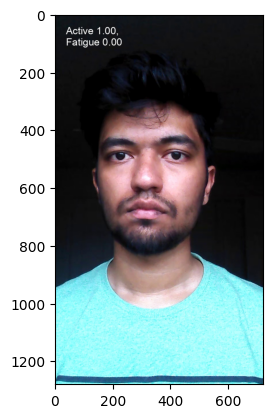

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
test = mpimg.imread('/kaggle/working/runs/classify/predict/image_16320.jpg')
plt.imshow(test)

In [10]:
# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/classify/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 2) (2.8 MB)
requirements: Ultralytics requirements ['onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 155.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 244.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 230.7 MB/s eta 0:00:00
   ━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 32.9MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.34file/s]


ONNX: starting export with onnx 1.16.0 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 0.6s, saved as '/kaggle/working/runs/classify/train/weights/best.onnx' (5.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 26.7s, saved as '/kaggle/working/runs/classify/train/weights/best_saved_model' (13.8 MB)

TensorFlow Lite: starting export with tensorflow 2.13.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite' (5.5 MB)

Export complete (28.0s)
Results saved to /kaggle/working/runs/classify/train/weights
Predict:         yolo predict task=classify model=/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=classify model=/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/input/drowsiness-detection/drowsiness/  
Visualize:       https://netron.app


'/kaggle/working/runs/classify/train/weights/best_saved_model/best_float32.tflite'